In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [15]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.nunique()

Release_Date         5893
Title                9513
Overview             9822
Popularity           8160
Vote_Count           3266
Vote_Average           74
Original_Language      43
Genre                2337
Poster_Url           9827
dtype: int64

In [6]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

### DATA CLEANING

In [7]:
# changing data types
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtypes)


datetime64[ns]


In [8]:
# extracting year from release data
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [9]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [19]:
# dropping irrelevant columns
cols = ['Overview', 'Original_Language', 'Poster_Url']

df.drop(cols, axis=1, inplace=True)
df.columns

        

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [20]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,8.1,Crime
4,2022-03-01,The Batman,3827.658,1151,8.1,Mystery


In [21]:
# splitting strings into lists and exploding
df['Genre'] = df['Genre'].str.split(', ')

df= df.explode('Genre').reset_index(drop=True)
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,8.1,Crime
4,2022-03-01,The Batman,3827.658,1151,8.1,Mystery


In [32]:
# categorizing vote_average into different components

def categorize_col (df,col,labels):
    """
    categorizes a certain columns based on quartiles

    Args:
       (df) df- dataframe we are processing
       (col) str- to be categorized column's name
       (labels) list- list of labels from min to max

    Returns:
        (df) df- dataframe with the categorized col
    """

    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

In [24]:
labels= ['not_popular', 'below_avg', 'average', 'popular']

categorize_col(df, 'Vote_Average', labels)
df['Vote_Average']. unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [25]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,popular,Crime
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery


In [26]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    6999
below_avg      6581
average        6432
popular        5540
Name: count, dtype: int64

In [28]:
df.dropna(inplace = True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [31]:
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25552 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  object  
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int64(1), object(2)
memory usage: 1.0+ MB


In [33]:
df.nunique()

Release_Date    5846
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

### **DATA VISUALIZATION**

### **Top 10 movies by popularity**

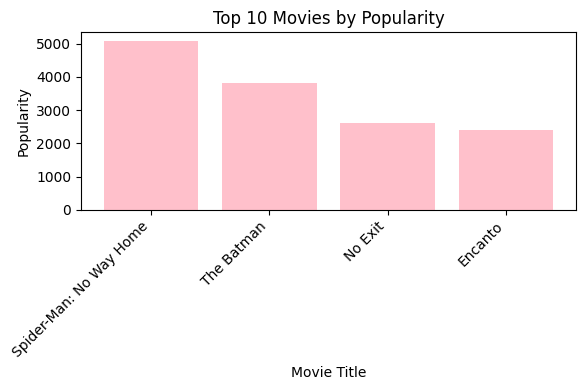

In [39]:
# Get top 10 movies by popularity
top_10 = df.nlargest(10, 'Popularity')


# Plot
plt.figure(figsize=(6,4))
plt.bar(top_10['Title'], top_10['Popularity'], color='pink')  
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Movie Title')
plt.ylabel('Popularity')
plt.title('Top 10 Movies by Popularity')
plt.tight_layout()
plt.show()



### **Top 10 movies by vote count**

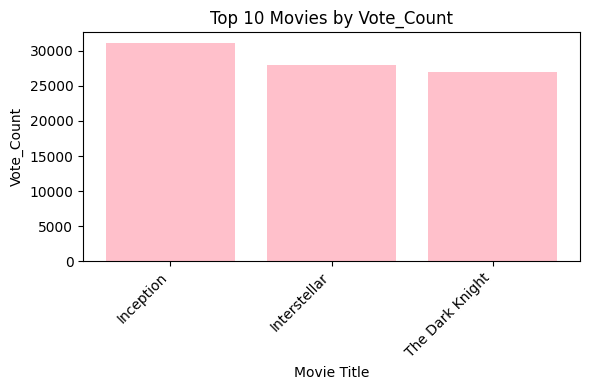

In [41]:
top_10 = df.nlargest(10, 'Vote_Count')


# Plot
plt.figure(figsize=(6,4))
plt.bar(top_10['Title'], top_10['Vote_Count'], color='pink')  
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Movie Title')
plt.ylabel('Vote_Count')
plt.title('Top 10 Movies by Vote_Count')
plt.tight_layout()
plt.show()


## **What is the most frequent genre in the dataset**

In [53]:
# movie count per genre 
df['Genre'].value_counts()


Genre
Drama              3715
Comedy             3006
Action             2652
Thriller           2473
Adventure          1829
Romance            1461
Horror             1457
Animation          1426
Family             1405
Fantasy            1295
Science Fiction    1255
Crime              1235
Mystery             765
History             426
War                 307
Music               291
TV Movie            214
Documentary         203
Western             137
Name: count, dtype: int64

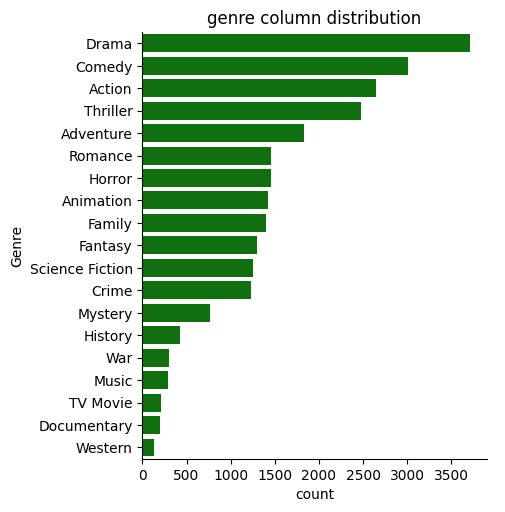

In [56]:
sns.catplot(y= 'Genre', data=df, kind = 'count',
            order = df['Genre'].value_counts().index,
            color = 'green')
plt.title('genre column distribution')
plt.show()

### **What genres has highest votes**

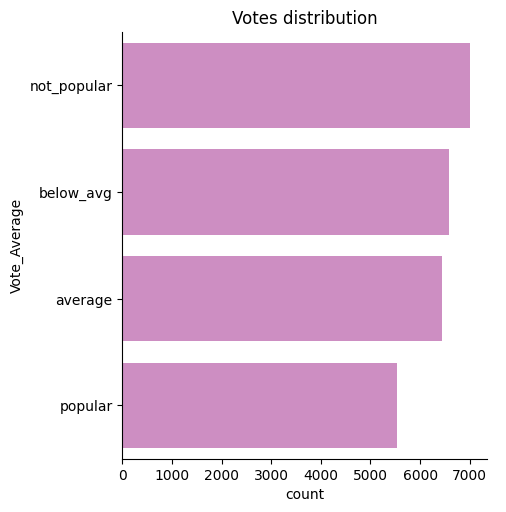

In [58]:
sns.catplot(y = 'Vote_Average', data = df, kind ='count',
            order = df['Vote_Average'].value_counts().index,
            color = '#d783c9')
plt.title('Votes distribution')
plt.show()

### **What movie got the highest popularity? what is its genre?**

In [59]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


### ** Which movie got the lowest popularity? what is its genre?**

In [60]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984-09-23,Threads,13.354,186,popular,War
25791,1984-09-23,Threads,13.354,186,popular,Drama
25792,1984-09-23,Threads,13.354,186,popular,Science Fiction


### **Which year has most filmmed movies**

In [ ]:
df['Release_Date'].hist()
plt.title('release_date column distribution')
plt.show()

## **CONCLUSION**

In [ ]:
# 1. Drama genre is the most frequent genre in our dataset and has appeared more than 14% of times among19 other genres
# 2. 